In [1]:
import matplotlib
from matplotlib import ticker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FormatStrFormatter

In [2]:
import os

In [6]:
os.chdir(r'G:\BaiduNetdiskDownload\共享单车轨迹\共享单车轨迹\01_研究生毕业论文\1_2_DataPreProcess')
dataFile = r'./dataRel.csv'

data = pd.read_csv(dataFile)
data

,index,reward,MotorCycle,roadDense,wall,Sky,Vegetation,Fence
0,11,0.370302,-0.388472,-0.439693,-0.066535,0.047279,-0.601358,-0.252635
1,12,0.405116,-0.397965,-0.108723,-0.067282,0.054706,-0.630707,-0.252635
2,24,0.339240,-1.364581,-0.220399,-1.765495,-2.096423,-1.377083,-1.408934
3,25,0.410462,-1.364581,-0.170532,-1.765495,-2.096423,-1.377083,-1.408934
4,26,0.478275,-1.364581,-0.046470,-1.765495,-2.096423,-1.377083,-1.408934
...,...,...,...,...,...,...,...,...
2169,4249,0.360015,0.261569,-0.504028,-0.115369,1.091301,-0.164178,-0.279820
2170,4261,0.491863,-0.284641,0.258209,-0.864371,0.987215,0.204430,-0.693203
2171,4295,0.421946,0.205337,-0.602856,0.071617,0.849787,-0.499849,-0.195388
2172,4296,0.427292,-0.301061,-0.263923,-0.055642,0.757346,-0.416765,-0.282064


In [60]:
cols = list(data.columns[2:])
cols = cols + ['reward']
cols

['MotorCycle', 'roadDense', 'wall', 'Sky', 'Vegetation', 'Fence', 'reward']

In [104]:
cmap = matplotlib.cm.get_cmap('YlGnBu')
# cols = list(cols)+['reward']
# cols
rank_attr = 'reward'

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_8244\3070060624.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('YlGnBu')


C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_8244\3420446537.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm,
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_8244\3420446537.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ax_info[rank_attr][0])


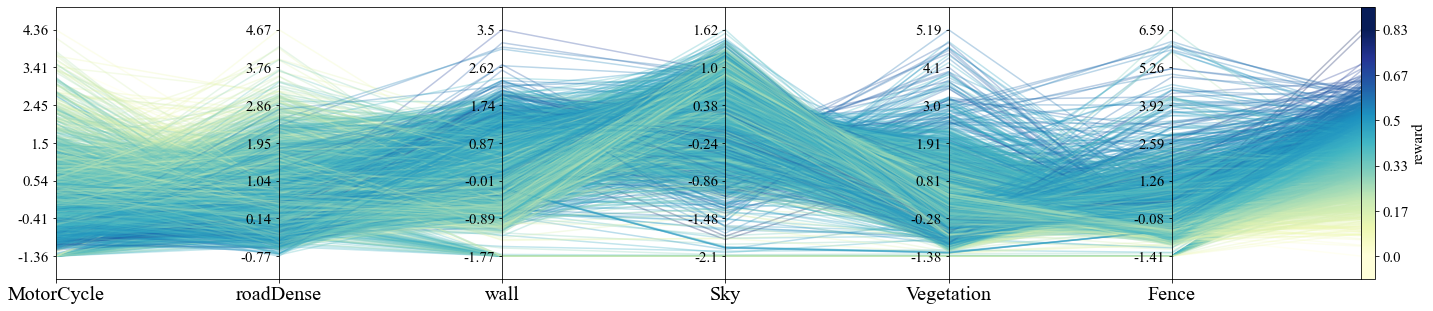

In [106]:
plt.rc('font',family='Times New Roman', size=15)
curvedextend = 0.1
spread = None
extendfrac = curvedextend

fig, axes = plt.subplots(1, len(cols)-1, sharey=False, figsize=(3*len(cols)+3,5))
valmat = np.ndarray(shape=(len(cols),len(data)))
x = np.arange(0,len(cols),1)
ax_info = {}
for i,col in enumerate(cols):
    vals = data[col]
    minval = np.min(vals)
    maxval = np.max(vals)
    rangeval = maxval - minval
    vals = np.true_divide(vals - minval, maxval-minval)
    nticks = 6
    tick_labels = [round(minval + i*(rangeval/nticks),2) for i in range(nticks+1)]
    ticks = [0 + i*(1.0/nticks) for i in range(nticks+1)]
    valmat[i] = vals
    ax_info[col] = [tick_labels,ticks]

for i,ax in enumerate(axes):
    for idx in range(valmat.shape[-1]):  
        ax.plot(x,valmat[:,idx],color=cmap(valmat[-1,idx]),alpha=0.3)
        ax.set_ylim(0-extendfrac,1+extendfrac)
        ax.set_xlim(i,i+1)
    
for dim, (ax,col) in enumerate(zip(axes,cols)):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    ax.yaxis.set_major_locator(ticker.FixedLocator(ax_info[col][1]))
    ax.set_yticklabels(ax_info[col][0])
    ax.set_xticklabels([cols[dim]], fontsize=20)

plt.subplots_adjust(wspace=0)
norm = matplotlib.colors.Normalize(0,1)#*axes[-1].get_ylim())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm,
                    pad=0,
                    label='reward',
                    extend='both',
                    extendrect=True,
                    extendfrac=extendfrac)
    
cbar.ax.set_yticklabels(ax_info[rank_attr][0])
# cbar.ax.set_xlabel(rank_attr)
# cbar.ax.set_title('reward')

plt.savefig('./parrallel.jpg',dpi=300)
plt.show()

## 对聚类后的结果进行处理

In [7]:
os.chdir(r'C:\Users\WINDOWS\Desktop\English_Version')

In [24]:
dataFile = r'./cluster0.csv'
dataCluster = pd.read_csv(dataFile)

In [25]:
dataCluster['reward'] = data['reward']
dataCluster_ini = dataCluster[['MotorCycle', 'roadDense', 'wall', 'Sky', 'Vegetation', 'Fence', 'reward','cluster']]
dataCluster_ini

,MotorCycle,roadDense,wall,Sky,Vegetation,Fence,reward,cluster
0,1.891257,2.508066,-1.961421,0.445290,-1.642796,-0.968147,0.370302,0
1,1.972765,2.240850,-1.856360,0.354036,-1.390117,-0.949578,0.405116,0
2,1.050060,1.621534,-3.044169,1.210869,-1.322127,-1.054234,0.339240,0
3,1.247364,1.546393,-2.905096,1.138610,-1.283460,-1.077068,0.410462,0
4,1.482198,1.289708,-2.521372,0.933660,-1.080832,-1.019004,0.478275,0
...,...,...,...,...,...,...,...,...
2169,-1.357192,3.534953,-0.645666,-1.435772,-0.636648,-1.139014,0.360015,1
2170,2.625168,1.937484,-1.680301,-0.826948,-0.633758,-1.201784,0.491863,0
2171,-1.056140,3.907539,-0.314174,-1.121038,-0.979828,-0.727356,0.421946,-1
2172,2.687092,2.648886,-1.319982,-0.510262,-1.366770,-0.705487,0.427292,0


In [39]:
# cols = list(dataCluster0.columns)
cols = ['MotorCycle', 'roadDense', 'wall', 'Sky', 'Vegetation', 'Fence', 'reward', 'cluster']
# cols = cols + ['reward']

cmap = matplotlib.cm.get_cmap('YlGnBu')
# cols = list(cols)+['reward']
# cols
rank_attr = 'cluster'

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_10224\2333542151.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('YlGnBu')


In [40]:
dataCluster_change = dataCluster[dataCluster['cluster']!=-1]

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_10224\2320264402.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm,
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_10224\2320264402.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ax_info[rank_attr][0])


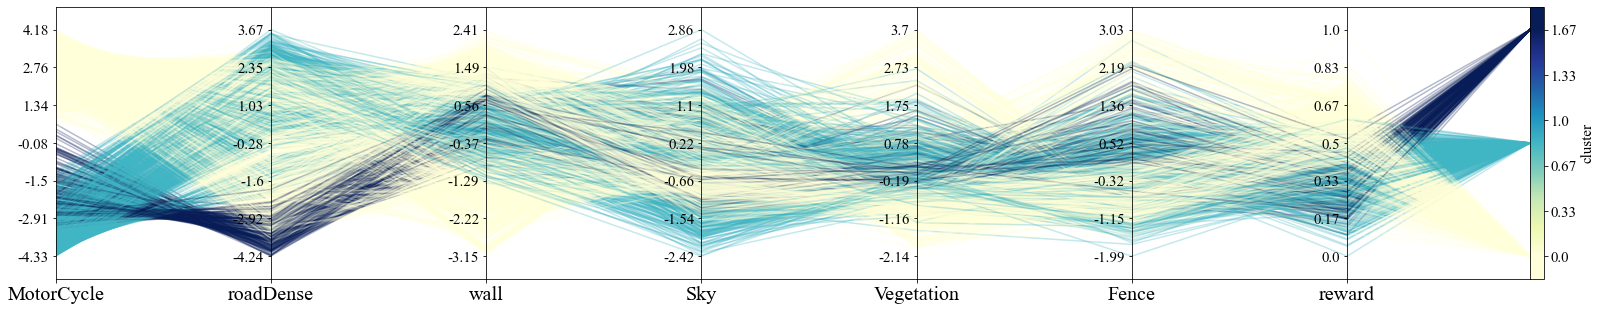

In [41]:
plt.rc('font',family='Times New Roman', size=15)
curvedextend = 0.1
spread = None
extendfrac = curvedextend

fig, axes = plt.subplots(1, len(cols)-1, sharey=False, figsize=(3*len(cols)+3,5))
valmat = np.ndarray(shape=(len(cols),len(dataCluster_change)))
x = np.arange(0,len(cols),1)
ax_info = {}
for i,col in enumerate(cols):
    vals = dataCluster_change[col]
    minval = np.min(vals)
    maxval = np.max(vals)
    rangeval = maxval - minval
    vals = np.true_divide(vals - minval, maxval-minval)
    nticks = 6
    tick_labels = [round(minval + i*(rangeval/nticks),2) for i in range(nticks+1)]
    ticks = [0 + i*(1.0/nticks) for i in range(nticks+1)]
    valmat[i] = vals
    ax_info[col] = [tick_labels,ticks]

for i,ax in enumerate(axes):
    for idx in range(valmat.shape[-1]):  
        ax.plot(x,valmat[:,idx],color=cmap(valmat[-1,idx]),alpha=0.3)
        ax.set_ylim(0-extendfrac,1+extendfrac)
        ax.set_xlim(i,i+1)
    
for dim, (ax,col) in enumerate(zip(axes,cols)):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    ax.yaxis.set_major_locator(ticker.FixedLocator(ax_info[col][1]))
    ax.set_yticklabels(ax_info[col][0])
    ax.set_xticklabels([cols[dim]], fontsize=20)

plt.subplots_adjust(wspace=0)
norm = matplotlib.colors.Normalize(0,1)#*axes[-1].get_ylim())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm,
                    pad=0,
                    label='cluster',
                    extend='both',
                    extendrect=True,
                    extendfrac=extendfrac)
    
cbar.ax.set_yticklabels(ax_info[rank_attr][0])
# cbar.ax.set_xlabel(rank_attr)
# cbar.ax.set_title('reward')

# plt.savefig('./parrallel.jpg',dpi=300)
plt.show()

In [76]:
dataFile2 = r'./cluster2.csv'
dataCluster_ini_2 = pd.read_csv(dataFile2)

In [77]:
dataCluster_ini_2['reward'] = data['reward']
dataCluster_change2 = dataCluster_ini_2
dataCluster_change2

,MotorCycle,roadDense,wall,Sky,Vegetation,Fence,cluster,reward
0,1.891257,2.508066,-1.961421,0.445290,-1.642796,-0.968147,1,0.370302
1,1.972765,2.240850,-1.856360,0.354036,-1.390117,-0.949578,1,0.405116
2,1.050060,1.621534,-3.044169,1.210869,-1.322127,-1.054234,3,0.339240
3,1.247364,1.546393,-2.905096,1.138610,-1.283460,-1.077068,3,0.410462
4,1.482198,1.289708,-2.521372,0.933660,-1.080832,-1.019004,3,0.478275
...,...,...,...,...,...,...,...,...
2169,-1.357192,3.534953,-0.645666,-1.435772,-0.636648,-1.139014,0,0.360015
2170,2.625168,1.937484,-1.680301,-0.826948,-0.633758,-1.201784,1,0.491863
2171,-1.056140,3.907539,-0.314174,-1.121038,-0.979828,-0.727356,0,0.421946
2172,2.687092,2.648886,-1.319982,-0.510262,-1.366770,-0.705487,1,0.427292


In [78]:
# cols = list(dataCluster0.columns)
cols = ['MotorCycle', 'roadDense', 'wall', 'Sky', 'Vegetation', 'Fence', 'reward', 'cluster']
# cols = cols + ['reward']

cmap = matplotlib.cm.get_cmap('YlGnBu')
# cols = list(cols)+['reward']
# cols
rank_attr = 'cluster'

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_10224\2333542151.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('YlGnBu')


In [79]:
# data_change3 = dataCluster_change2[dataCluster_change2['cluster']!=-1]
# data_change3

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_10224\2263014920.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm,
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_10224\2263014920.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ax_info[rank_attr][0])


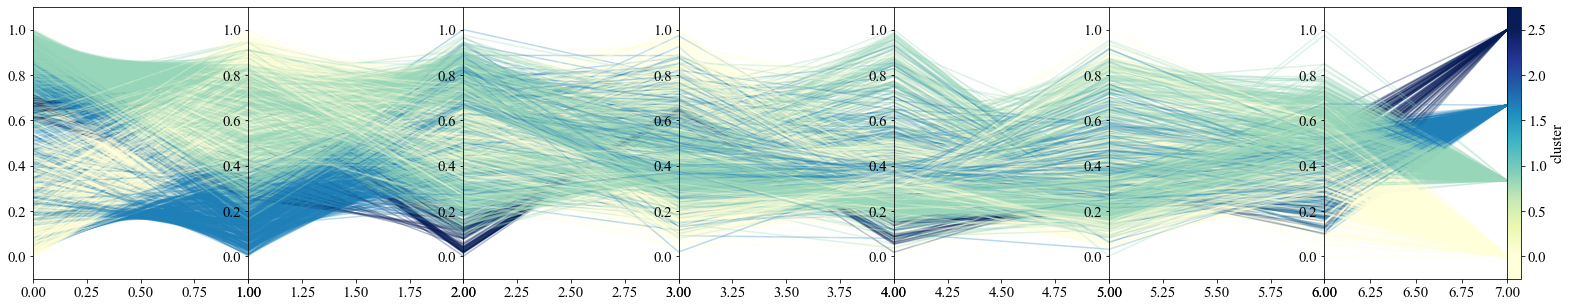

In [80]:
plt.rc('font',family='Times New Roman', size=15)
curvedextend = 0.1
spread = None
extendfrac = curvedextend

fig, axes = plt.subplots(1, len(cols)-1, sharey=False, figsize=(3*len(cols)+3,5))
valmat = np.ndarray(shape=(len(cols),len(dataCluster_change2)))
x = np.arange(0,len(cols),1)
ax_info = {}
for i,col in enumerate(cols):
    vals = dataCluster_change2[col]
    minval = np.min(vals)
    maxval = np.max(vals)
    rangeval = maxval - minval
    vals = np.true_divide(vals - minval, maxval-minval)
    nticks = 6
    tick_labels = [round(minval + i*(rangeval/nticks),2) for i in range(nticks+1)]
    ticks = [0 + i*(1.0/nticks) for i in range(nticks+1)]
    valmat[i] = vals
    ax_info[col] = [tick_labels,ticks]

for i,ax in enumerate(axes):
    for idx in range(valmat.shape[-1]):  
        ax.plot(x,valmat[:,idx],color=cmap(valmat[-1,idx]),alpha=0.3)
        ax.set_ylim(0-extendfrac,1+extendfrac)
        ax.set_xlim(i,i+1)
    
for dim, (ax,col) in enumerate(zip(axes0,cols)):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    ax.yaxis.set_major_locator(ticker.FixedLocator(ax_info[col][1]))
    ax.set_yticklabels(ax_info[col][0])
    ax.set_xticklabels([cols[dim]], fontsize=20)

plt.subplots_adjust(wspace=0)
norm = matplotlib.colors.Normalize(0,1)#*axes[-1].get_ylim())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm,
                    pad=0,
                    label='cluster',
                    extend='both',
                    extendrect=True,
                    extendfrac=extendfrac)
    
cbar.ax.set_yticklabels(ax_info[rank_attr][0])
# cbar.ax.set_xlabel(rank_attr)
# cbar.ax.set_title('reward')

# plt.savefig('./parrallel.jpg',dpi=300)
plt.show()

In [29]:
dataCluster1 = dataCluster_ini[dataCluster_ini['cluster'] == 1]

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_10224\514112474.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm,
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_10224\514112474.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ax_info[rank_attr][0])


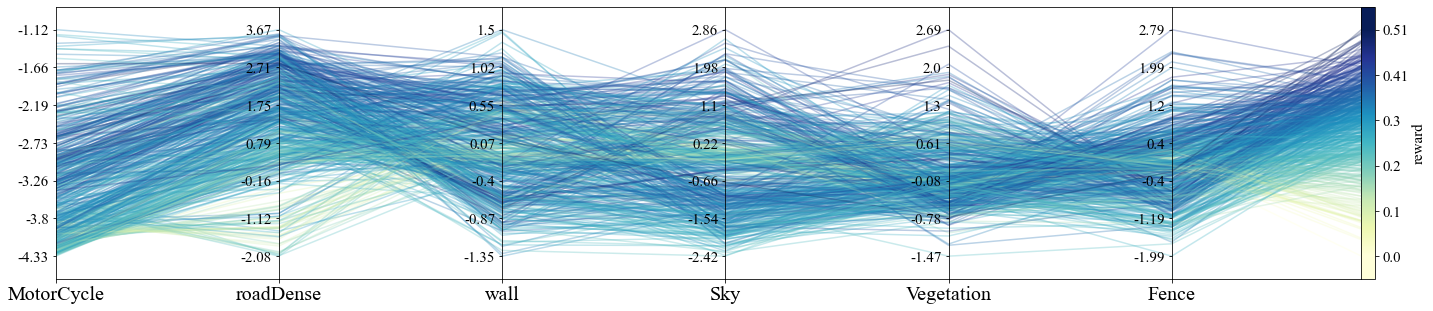

In [30]:
plt.rc('font',family='Times New Roman', size=15)
curvedextend = 0.1
spread = None
extendfrac = curvedextend

fig, axes = plt.subplots(1, len(cols)-1, sharey=False, figsize=(3*len(cols)+3,5))
valmat = np.ndarray(shape=(len(cols),len(dataCluster1)))
x = np.arange(0,len(cols),1)
ax_info = {}
for i,col in enumerate(cols):
    vals = dataCluster1[col]
    minval = np.min(vals)
    maxval = np.max(vals)
    rangeval = maxval - minval
    vals = np.true_divide(vals - minval, maxval-minval)
    nticks = 6
    tick_labels = [round(minval + i*(rangeval/nticks),2) for i in range(nticks+1)]
    ticks = [0 + i*(1.0/nticks) for i in range(nticks+1)]
    valmat[i] = vals
    ax_info[col] = [tick_labels,ticks]

for i,ax in enumerate(axes):
    for idx in range(valmat.shape[-1]):  
        ax.plot(x,valmat[:,idx],color=cmap(valmat[-1,idx]),alpha=0.3)
        ax.set_ylim(0-extendfrac,1+extendfrac)
        ax.set_xlim(i,i+1)
    
for dim, (ax,col) in enumerate(zip(axes,cols)):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    ax.yaxis.set_major_locator(ticker.FixedLocator(ax_info[col][1]))
    ax.set_yticklabels(ax_info[col][0])
    ax.set_xticklabels([cols[dim]], fontsize=20)

plt.subplots_adjust(wspace=0)
norm = matplotlib.colors.Normalize(0,1)#*axes[-1].get_ylim())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm,
                    pad=0,
                    label='reward',
                    extend='both',
                    extendrect=True,
                    extendfrac=extendfrac)
    
cbar.ax.set_yticklabels(ax_info[rank_attr][0])
# cbar.ax.set_xlabel(rank_attr)
# cbar.ax.set_title('reward')

# plt.savefig('./parrallel.jpg',dpi=300)
plt.show()

In [31]:
dataCluster2 = dataCluster_ini[dataCluster_ini['cluster'] == 2]

In [32]:
def plotFunc(data):
    plt.rc('font',family='Times New Roman', size=15)
    curvedextend = 0.1
    spread = None
    extendfrac = curvedextend

    fig, axes = plt.subplots(1, len(cols)-1, sharey=False, figsize=(3*len(cols)+3,5))
    valmat = np.ndarray(shape=(len(cols),len(data)))
    x = np.arange(0,len(cols),1)
    ax_info = {}
    for i,col in enumerate(cols):
        vals = data[col]
        minval = np.min(vals)
        maxval = np.max(vals)
        rangeval = maxval - minval
        vals = np.true_divide(vals - minval, maxval-minval)
        nticks = 6
        tick_labels = [round(minval + i*(rangeval/nticks),2) for i in range(nticks+1)]
        ticks = [0 + i*(1.0/nticks) for i in range(nticks+1)]
        valmat[i] = vals
        ax_info[col] = [tick_labels,ticks]

    for i,ax in enumerate(axes):
        for idx in range(valmat.shape[-1]):  
            ax.plot(x,valmat[:,idx],color=cmap(valmat[-1,idx]),alpha=0.3)
            ax.set_ylim(0-extendfrac,1+extendfrac)
            ax.set_xlim(i,i+1)
    
    for dim, (ax,col) in enumerate(zip(axes,cols)):
        ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
        ax.yaxis.set_major_locator(ticker.FixedLocator(ax_info[col][1]))
        ax.set_yticklabels(ax_info[col][0])
        ax.set_xticklabels([cols[dim]], fontsize=20)

    plt.subplots_adjust(wspace=0)
    norm = matplotlib.colors.Normalize(0,1)#*axes[-1].get_ylim())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm,
                        pad=0,
                        label='reward',
                        extend='both',
                        extendrect=True,
                        extendfrac=extendfrac)
    
    cbar.ax.set_yticklabels(ax_info[rank_attr][0])
    # cbar.ax.set_xlabel(rank_attr)
    # cbar.ax.set_title('reward')

    # plt.savefig('./parrallel.jpg',dpi=300)
    plt.show()

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_10224\3139350374.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm,
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_10224\3139350374.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ax_info[rank_attr][0])


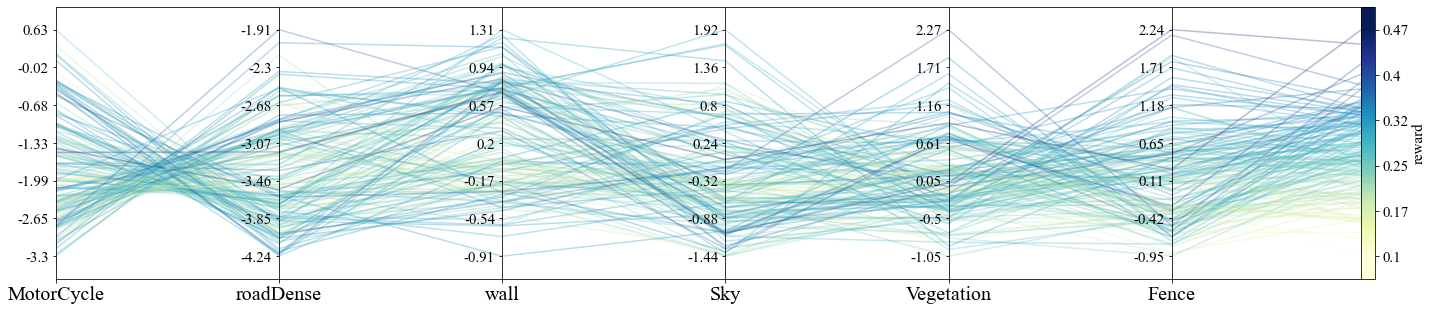

In [33]:
plotFunc(data=dataCluster2)